# Runge Kutta Approximation for Oscillator

Range Kutta approximation can be done on a pendulum given by the differential equations.
$$
-\frac{g}{l} sin{\theta} = \ddot{\theta}
$$

This is can be expressed as the following:
$$
    q_1 = \theta
$$
$$
    q_2 = \dot{\theta}
$$

Now we can write it as the following:
$$
    \dot{q_1} = q_2
$$
$$
    \dot{q_2} = -\frac{g}{l} sin(q_1)
$$

In [2]:
# Importing the necessary Python libraries
import numpy as np
import math as mt
import matplotlib.pyplot as plt


Text(0, 0.5, "$\\theta'$")

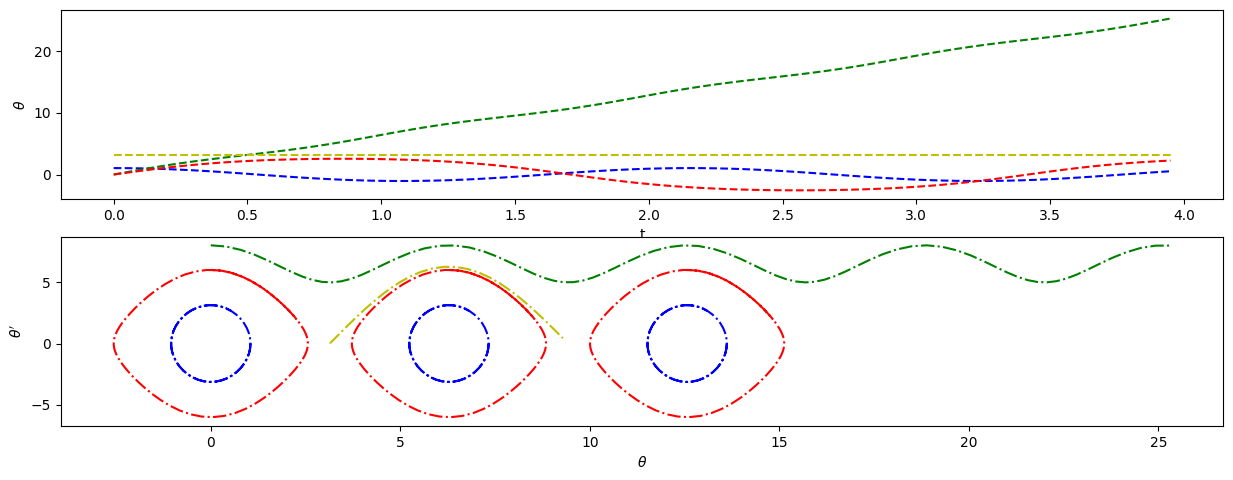

In [3]:
g = 9.8
l = 1

def DifferentialForPendulum(y, y_dot, x):
    return {"q1":y_dot, "q2":-(g/l)*mt.sin(y)}

def SimulatedFuncValues(x_values, h, q1_0, q2_0, differential):
    q1_val = np.zeros_like(x_values)
    q2_val = np.zeros_like(x_values)
    
    q1_val[0] = q1_0
    q2_val[0] = q2_0
    for i in range(1, len(x_values)):
        k1 = differential(q1_val[i-1], q2_val[i-1], x_values[i-1])
        k2 = differential(q1_val[i-1] + (h/2)*k1["q1"] , q2_val[i-1] + (h/2)*k1["q2"],  x_values[i-1]+(h/2))
        k3 = differential(q1_val[i-1] + (h/2)*k2["q1"], q2_val[i-1] + (h/2)*k2["q2"], x_values[i-1]+(h/2))
        k4 = differential(q1_val[i-1] + h*k3["q1"] , q2_val[i-1] + (h)*k3["q2"], x_values[i-1]+h)
        q1_val[i] = q1_val[i-1] + ((k1["q1"] + 2*k2["q1"] + 2*k3["q1"] + k4["q1"])/6)*h
        q2_val[i] = q2_val[i-1] + ((k1["q2"] + 2*k2["q2"] + 2*k3["q2"] + k4["q2"])/6)*h
    return (q1_val, q2_val)

x_values = np.arange(0,4,0.05)

fig, ax = plt.subplots(2, figsize=(15, 5.4))
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[0], '--b')
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[0], '--g')
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[0], '--r')
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=mt.pi, q2_0=0, differential=DifferentialForPendulum)[0], '--y')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[1],
    '-.b')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[1],
    '-.g')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=4*mt.pi, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=4*mt.pi, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 4*mt.pi, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 4*mt.pi, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.b')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.b')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi)+0.001, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi)+0.001, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.y')

ax[0].set_xlabel("t")
ax[0].set_ylabel(r"$\theta$")
ax[1].set_xlabel(r"$\theta$")
ax[1].set_ylabel(r"$\theta'$")
# ax[0].legend()


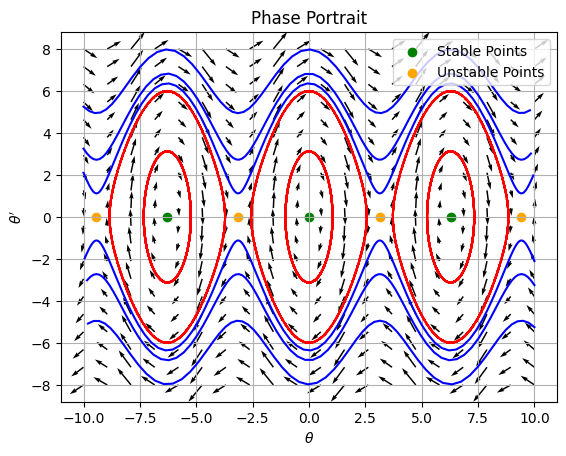

In [4]:
g = 9.8
l = 1

# Step 1: Create a mesh grid
x = np.linspace(-10, 10, 20)
y = np.linspace(-8, 8, 20)
X, Y = np.meshgrid(x, y)

# Step 2: Define the vector field components
U = Y
V = -np.sin(X)*(g/l)

# Step 3: Plot the vector field
plt.figure()
plt.quiver(X, Y, U, V)
plt.title('Phase Portrait')
plt.xlabel(r'$\theta$')
plt.ylabel(r"$\theta'$")

def filter_coordinates(x, y, threshold=10):
    
    # Create a boolean mask for x values with absolute values <= threshold
    mask = np.abs(x) <= threshold
    
    # Apply the mask to both x and y arrays
    x_filtered = x[mask]
    y_filtered = y[mask]
    
    return x_filtered, y_filtered

x_values = np.arange(-10,10,0.05)

plt.plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[1],
    '-.r')
# plt.plot(
#     SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[0],
#     SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[1],
#     '-.g')
plt.plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
plt.plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=-2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=-2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
plt.plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) - 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) - 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.r')
plt.plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
plt.plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.r')

a = SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=-10, q2_0=3.25, differential=DifferentialForPendulum)
b = filter_coordinates(x=a[0], y=a[1])
plt.plot(b[0], b[1], '-b')


# a = SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=-10, q2_0=mt.pi, differential=DifferentialForPendulum)
# b = filter_coordinates(x=a[0], y=a[1])
# plt.plot(b[0], b[1], '-.b')


a1 = SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=10, q2_0=-3.25, differential=DifferentialForPendulum)
b1 = filter_coordinates(x=a1[0], y=a1[1])
plt.plot(b1[0], b1[1], '-b')

a1 = SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=10, q2_0=-5.25, differential=DifferentialForPendulum)
b1 = filter_coordinates(x=a1[0], y=a1[1])
plt.plot(b1[0], b1[1], '-b')

a1 = SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=-10, q2_0=5.25, differential=DifferentialForPendulum)
b1 = filter_coordinates(x=a1[0], y=a1[1])
plt.plot(b1[0], b1[1], '-b')

a1 = SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=-10, q2_0=2.1, differential=DifferentialForPendulum)
b1 = filter_coordinates(x=a1[0], y=a1[1])
plt.plot(b1[0], b1[1], '-b')

a1 = SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=10, q2_0=-2.1, differential=DifferentialForPendulum)
b1 = filter_coordinates(x=a1[0], y=a1[1])
plt.plot(b1[0], b1[1], '-b')

plt.scatter([0, 2 * mt.pi, -2*mt.pi], [0]*3, color="green", label="Stable Points")
plt.scatter([mt.pi, -mt.pi ,3 * mt.pi, -3*mt.pi], [0]*4, color="orange", label="Unstable Points")

plt.legend()
plt.grid()
plt.show()

/var/folders/88/wl5ftm6543l8qjh4j574vxv40000gn/T/ipykernel_44630/3716114469.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


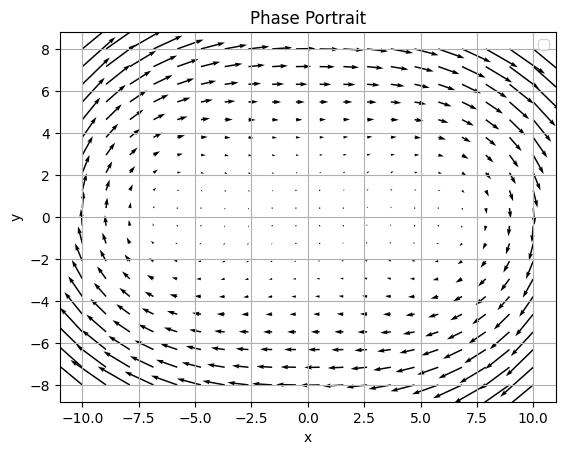

In [8]:


# Step 1: Create a mesh grid
x = np.linspace(-10, 10, 20)
y = np.linspace(-8, 8, 20)
X, Y = np.meshgrid(x, y)

delta = 1
p = 100
K = 3

# Step 2: Define the vector field components
U = Y*(delta + p + K*(X**2 + Y**2))
V = X*(-delta + p - K*(X**2 + Y**2))

# Step 3: Plot the vector field
plt.figure()
plt.quiver(X, Y, 10*U, 10*V)
plt.title('Phase Portrait')
plt.xlabel(r'x')
plt.ylabel(r"y")

plt.legend()
plt.grid()
plt.show()
